# EDA
In this notebook cleaned data is loaded to pandas and analysed. At the end of the notebook survival analysis is done to each manufacturer.

# BackBlaze Data Center Hard Disk Survival Analysis from Diagnosis Data

# Kaplan Meier Survival Analysis  
The Kaplan–Meier method is a more sophisticated method of summarising survival data, which uses all the cases in a series, not just those followed up until the selected cut-off. The technique is to divide the follow-up period into a number of small time intervals, determining for each interval the number of cases followed up over that interval and the number of events of interest (e.g. deaths) during each period.  
In this my analysis birth event is the date when the diagnosis data recorded for the first time for the each HDD, death event is when the HDD failure occurs. Censor case is when HDD is removed from the usage before without any failure data recorded. 


## Import Libs

In [1]:
#!pip install LifeLines

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 160
plt.rcParams["axes.grid"] = True
%matplotlib inline

In [124]:
df=pd.read_csv('./use_data/hdd_data.csv') #load csv

In [125]:
df.head() #check data

,manuf,model,sn,retired_date,launched_date,observed_days,cap_tb,failed_date,max_hours,failed_hours,failure,max_years,year
0,Seagate,ST8000DM002,ZA12KZ1X,2019-09-30,2016-08-07,1143,7.277379,NaN,27951.0,NaN,0,3.188638,2016
1,Seagate,ST4000DM000,S30117YT,2019-09-30,2015-05-06,1587,3.638695,NaN,38383.0,NaN,0,4.378715,2015
2,Seagate,ST12000NM0007,ZJV2EHGV,2019-09-30,2018-12-19,286,10.914062,NaN,6941.0,NaN,0,0.791826,2018
3,Seagate,ST12000NM0007,ZJV02Y65,2019-09-30,2018-05-16,501,10.914062,NaN,12209.0,NaN,0,1.392797,2018
4,HGST/Hitachi,HGST HMS5C4040BLE640,PL1331LAHER2KH,2019-09-30,2017-02-17,956,3.638695,NaN,23305.0,NaN,0,2.658624,2017


In [126]:
df.shape #check shape

(144626, 13)

In [127]:
df.info() #check types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144626 entries, 0 to 144625
Data columns (total 13 columns):
manuf            144626 non-null object
model            144626 non-null object
sn               144625 non-null object
retired_date     144626 non-null object
launched_date    144626 non-null object
observed_days    144626 non-null int64
cap_tb           144626 non-null float64
failed_date      6422 non-null object
max_hours        144565 non-null float64
failed_hours     6401 non-null float64
failure          144626 non-null int64
max_years        144565 non-null float64
year             144626 non-null int64
dtypes: float64(4), int64(3), object(6)
memory usage: 14.3+ MB


In [128]:
#change to appropriate data types
df['retired_date'] = df['retired_date'].astype('datetime64[ns]')
df['launched_date'] = df['launched_date'].astype('datetime64[ns]')
df['failed_date'] = df['failed_date'].astype('datetime64[ns]')

In [129]:
df.info() #check types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144626 entries, 0 to 144625
Data columns (total 13 columns):
manuf            144626 non-null object
model            144626 non-null object
sn               144625 non-null object
retired_date     144626 non-null datetime64[ns]
launched_date    144626 non-null datetime64[ns]
observed_days    144626 non-null int64
cap_tb           144626 non-null float64
failed_date      6422 non-null datetime64[ns]
max_hours        144565 non-null float64
failed_hours     6401 non-null float64
failure          144626 non-null int64
max_years        144565 non-null float64
year             144626 non-null int64
dtypes: datetime64[ns](3), float64(4), int64(3), object(3)
memory usage: 14.3+ MB


In [130]:
df=df.sort_values(by=['launched_date']) #sort by hdd started operation date

In [131]:
df.head() #check

,manuf,model,sn,retired_date,launched_date,observed_days,cap_tb,failed_date,max_hours,failed_hours,failure,max_years,year
144625,Seagate,ST1500DL003,5YD4L8FB,2013-04-16,2013-04-10,7,1.364517,2013-04-16,4067.0,4067.0,1,0.463962,2013
53525,Seagate,ST3000DM001,S1F0CVLM,2013-05-21,2013-04-10,42,2.729023,2013-05-21,7466.0,7466.0,1,0.851718,2013
125920,HGST/Hitachi,Hitachi HDS5C4040ALE630,PL1311LAG25R7A,2013-07-30,2013-04-10,70,3.638695,NaT,3812.0,NaN,0,0.434871,2013
125921,Seagate,ST3000DM001,Z1F1EM25,2013-06-26,2013-04-10,78,2.729023,2013-06-26,5367.0,5367.0,1,0.612265,2013
125922,Seagate,ST3000DM001,W1F0X51C,2013-05-08,2013-04-10,29,2.729023,2013-05-08,5205.0,5205.0,1,0.593784,2013


## Overall commonly used manufacturer 

Seagate         100636
HGST/Hitachi     38876
TOSHIBA           2531
WDC               2510
Samsung             11
Name: manuf, dtype: int64


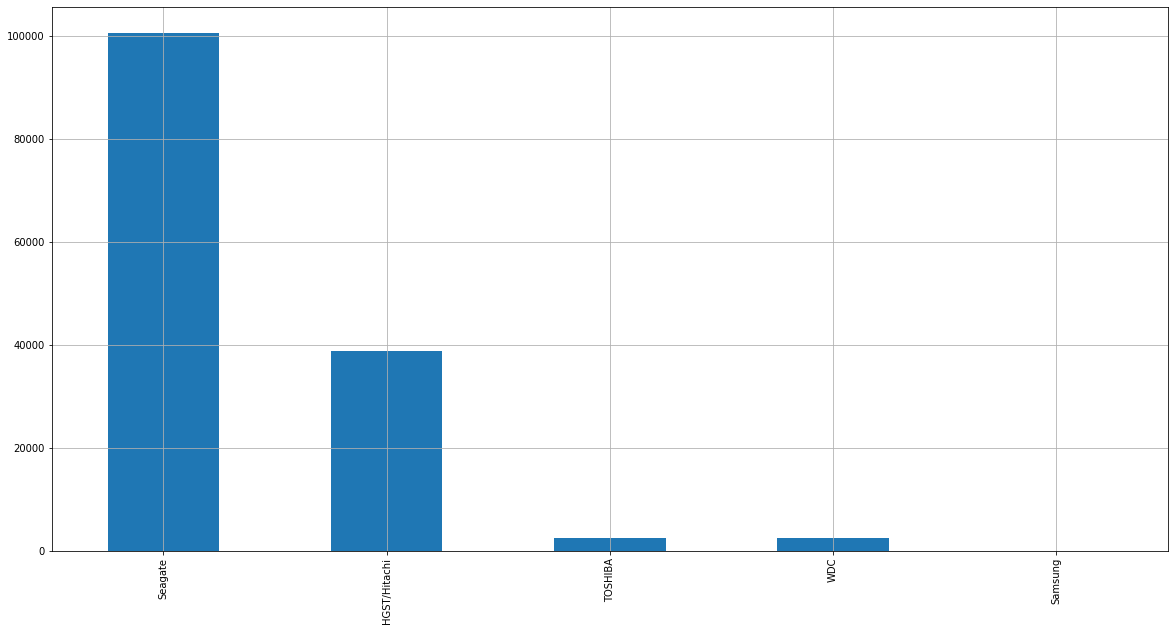

In [159]:
#check popular maufacturer
print(df['manuf'].value_counts())
df['manuf'].value_counts().plot(kind='bar',figsize=(20,10))
plt.show()

Overall number of Seagate hard disks used by BackBlaze has been high throughout the years followed my Hitachi.

### Hard disk manufaturer usage by year

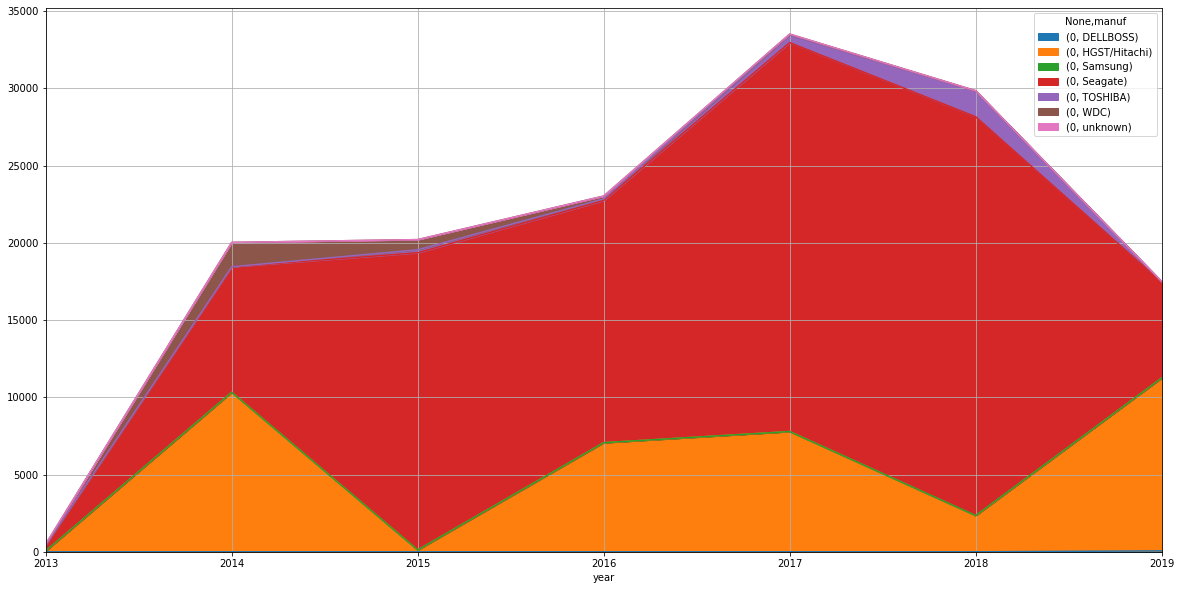

In [133]:
ax=df.assign(dummy = 1).groupby(['year','manuf']
                            ).size().to_frame().unstack().plot(kind='area',stacked=True,figsize=(20,10))
plt.show()

Number of Seagate HDDs are dwindling in 2019 starting from 2017 after rising since 2013 and number of HGST HDDs are on the rise.

### Number of hard disk used each year by manufacturer

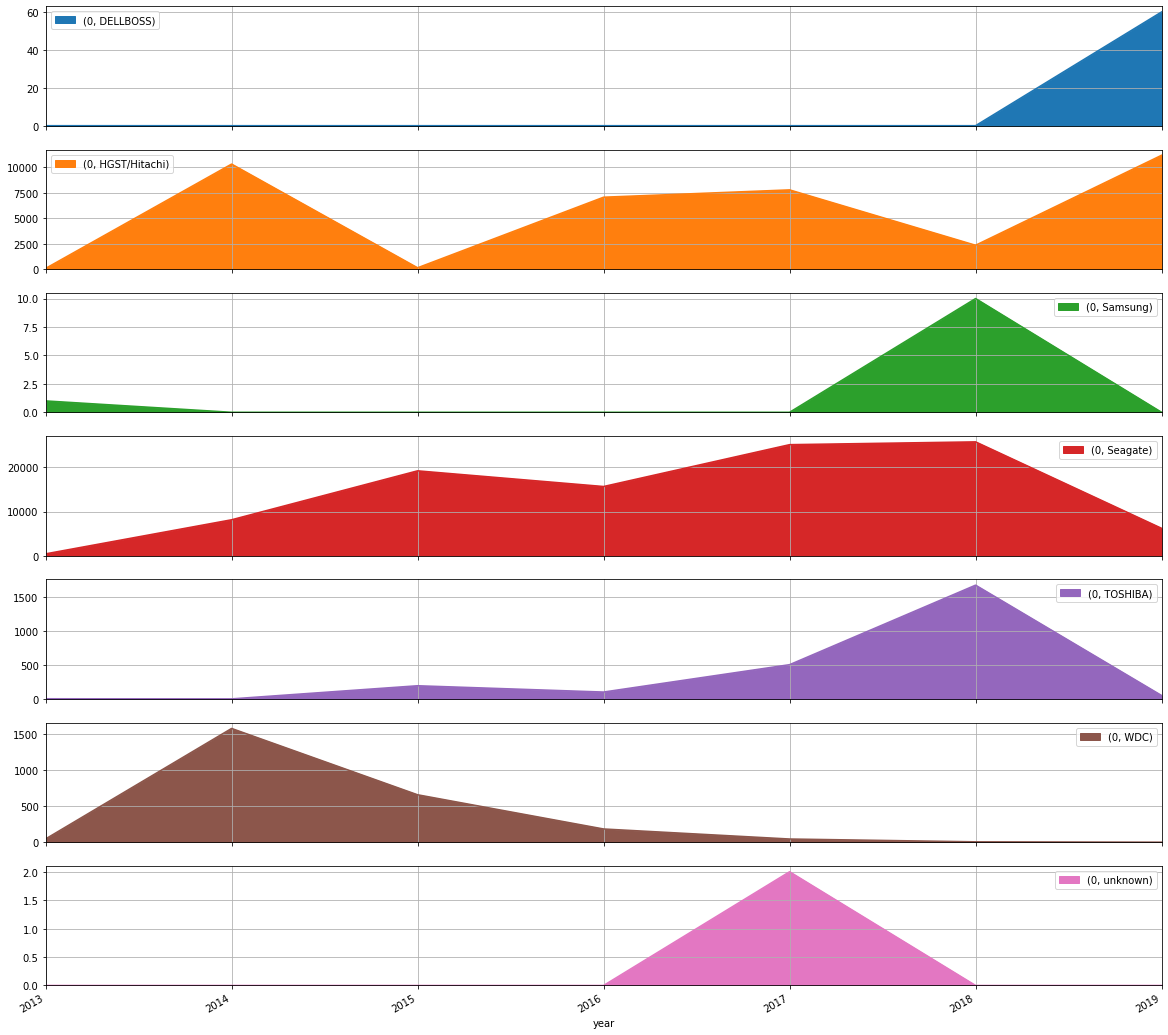

In [134]:
df.assign(dummy = 1).groupby(['year','manuf']
                            ).size().to_frame().unstack().plot(kind='area',subplots=True,figsize=(20,20))
plt.show()

DellBOSS VD (Dell PowerEdge Boot Optimized Storage Solution) RAID solution coming in to play in recent years.  
HGST usage as seen before it is on the rise and higher than the years before.  
Samsung usage has ended by 2019.  
WDC as been decreasing since 2014.  
Seagate has been in high volumn usage until 2018 and falling ever since.

## Commonly used model

In [135]:
#check popular model of hdd
df1=df.groupby(['year','manuf','model']).count()
hddcnt=df1[['sn']]
hddcnt.columns=['Total']
hddcnt=hddcnt.sort_values(by=['Total'], ascending=False)
hddcnt

Total
year manuf        model                      
2018 Seagate      ST12000NM0007         25412
2015 Seagate      ST4000DM000           16987
2017 Seagate      ST8000NM0055          14449
2019 HGST/Hitachi HGST HUH721212ALN604   9596
2016 Seagate      ST8000DM002            8715
...                                       ...
                  ST1000LM024 HN            1
2015 Seagate      ST320LT007                1
                  ST320005XXXX              1
                  ST250LM004 HN             1
     WDC          WDC WD3200BEKX            1

[206 rows x 1 columns]

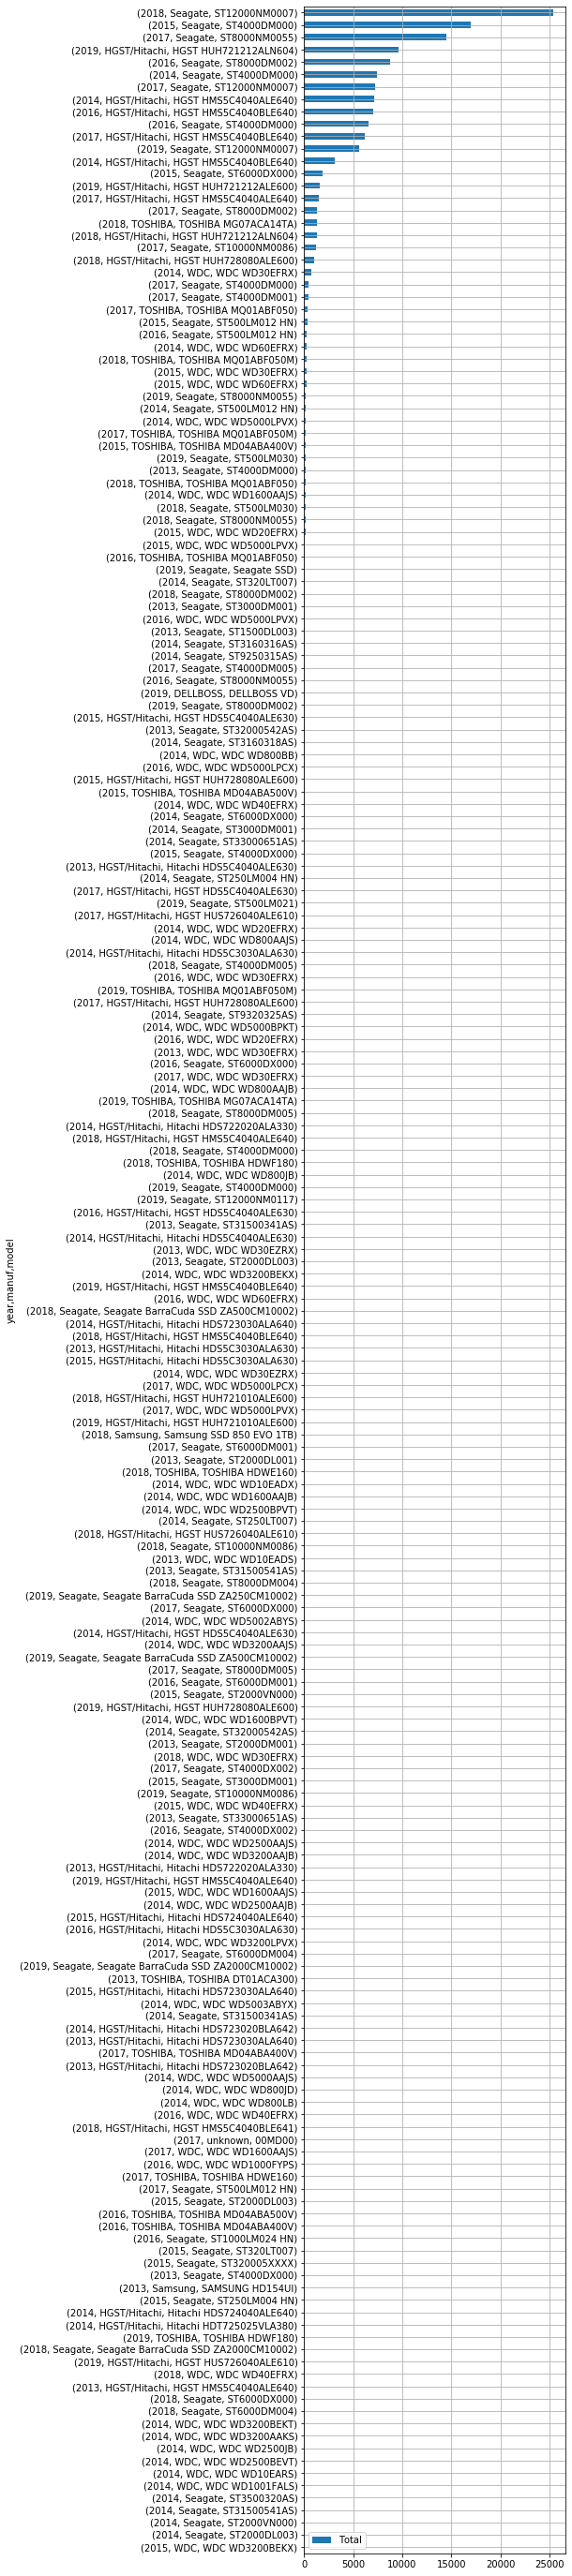

In [136]:
hddcnt=hddcnt.sort_values(by=['Total'], ascending=True)
hddcnt.plot(kind='barh',figsize=(5,50))
plt.show()

Seagate ST12000NM0007, ST4000DM000 and ST8000NM0055 are the commonly used models in the previous years but in 2019 number of HGST HMS5C4040BLE640 usage is increased.

### Commonly used model by year

In [137]:
hddcnt=hddcnt.sort_values(by=['year','Total'], ascending=False)
hddcnt

Total
year manuf        model                         
2019 HGST/Hitachi HGST HUH721212ALN604      9596
     Seagate      ST12000NM0007             5618
     HGST/Hitachi HGST HUH721212ALE600      1564
     Seagate      ST8000NM0055               190
                  ST500LM030                 143
...                                          ...
2013 TOSHIBA      TOSHIBA DT01ACA300           2
     HGST/Hitachi HGST HMS5C4040ALE640         1
     Samsung      SAMSUNG HD154UI              1
     Seagate      ST4000DX000                  1
     HGST/Hitachi Hitachi HDS723020BLA642      1

[206 rows x 1 columns]

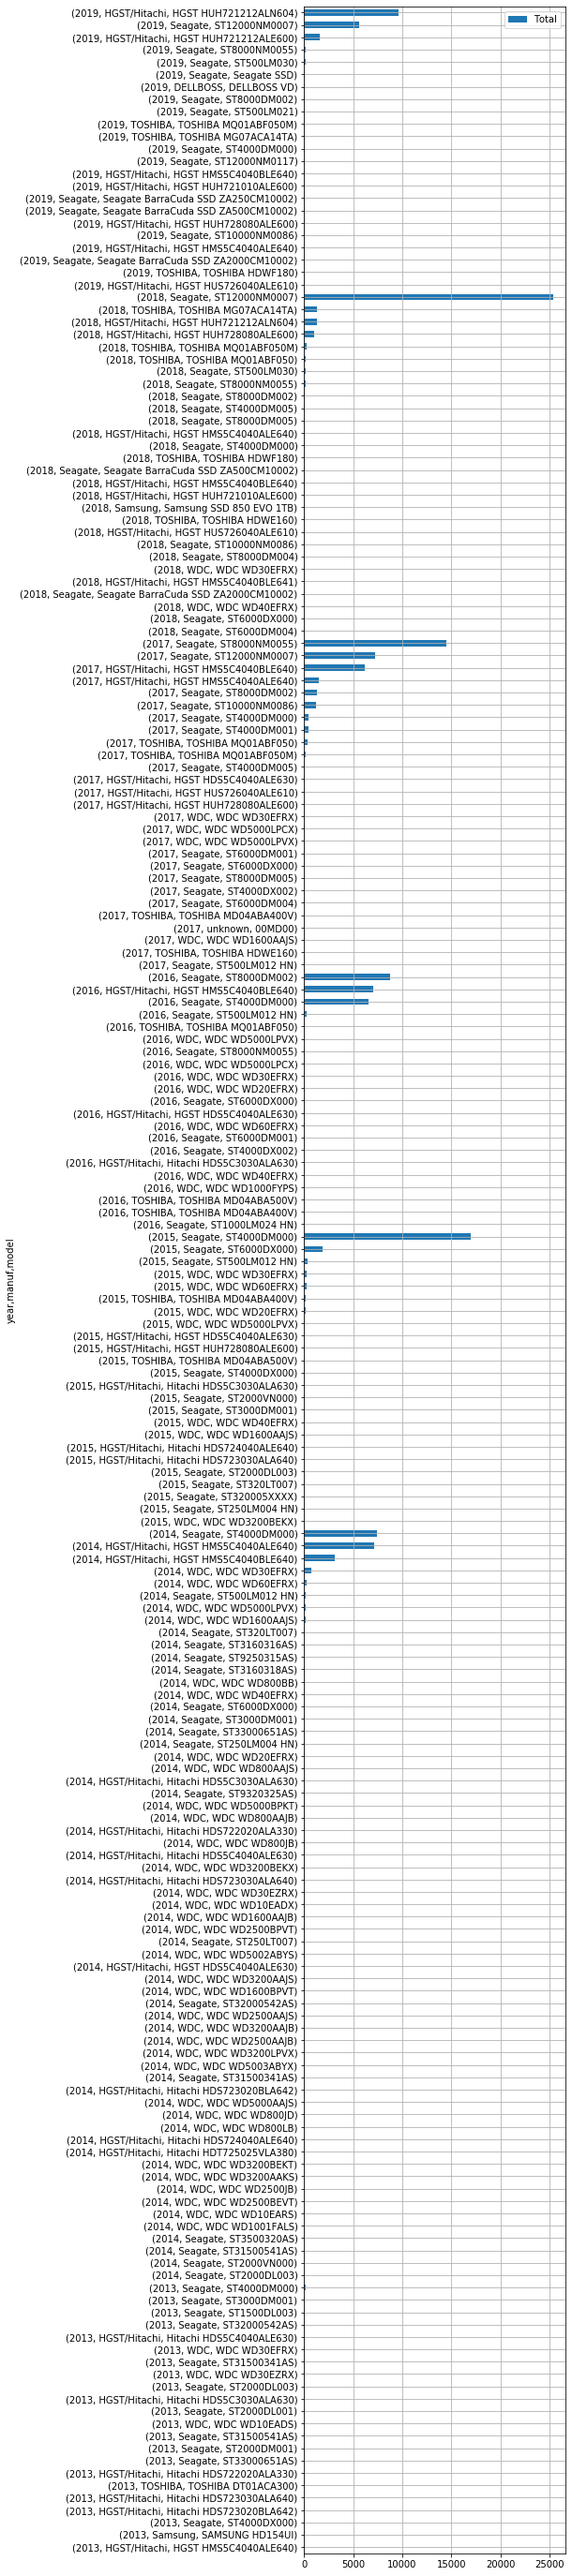

In [138]:
hddcnt=hddcnt.sort_values(by=['year','Total'], ascending=True)
hddcnt.plot(kind='barh',figsize=(5,50))
plt.show()

## Commonly used hard disk capacity

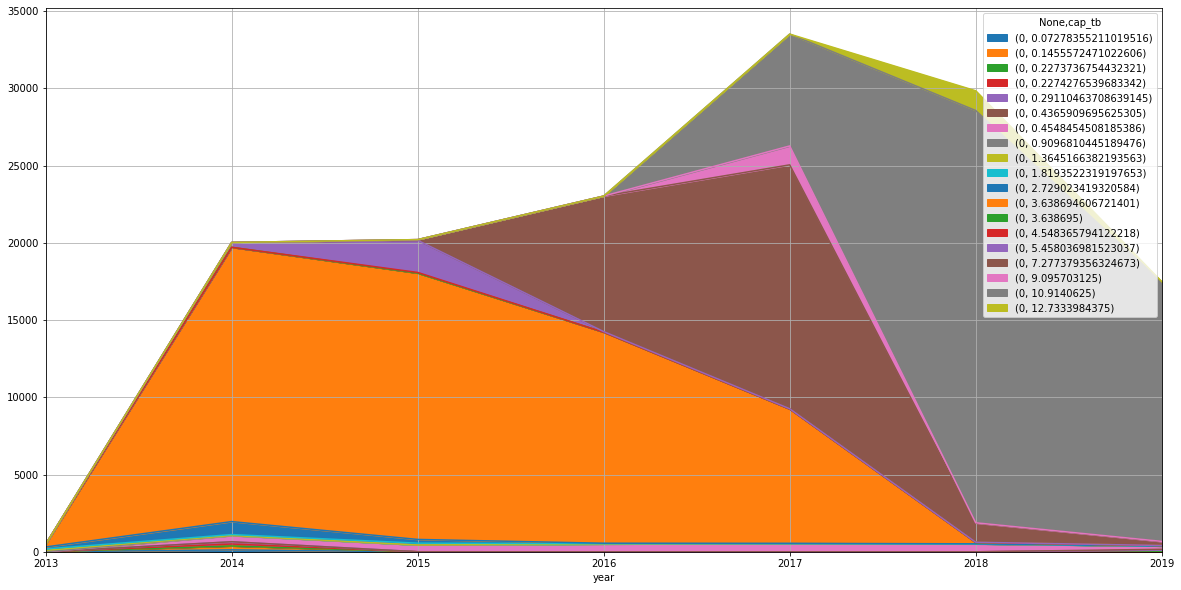

In [139]:
df.assign(dummy = 1).groupby(['year','cap_tb']).size().to_frame().unstack().plot(kind='area',stacked=True,figsize=(20,10))
plt.show()

At the current data centre most of the storages are made out of 10.91TB storages 

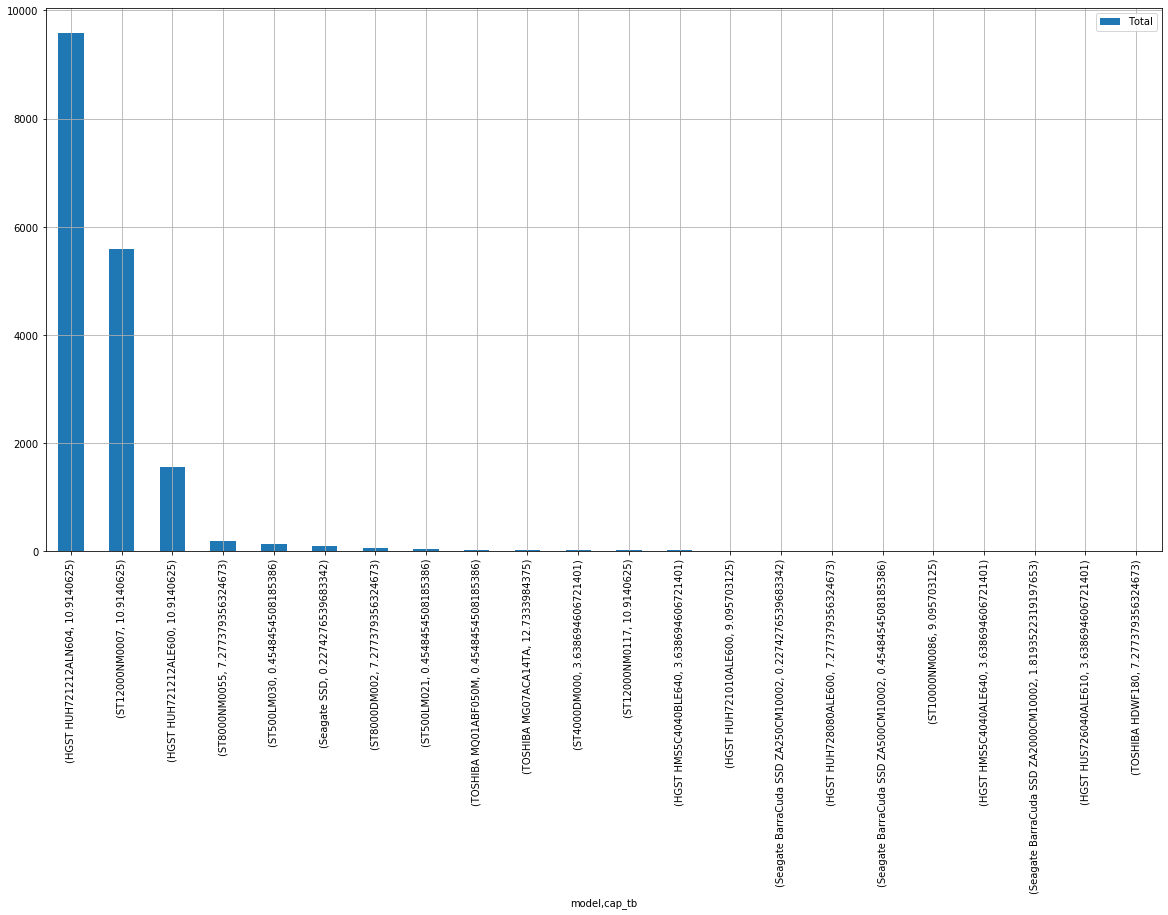

In [158]:
#check popular model of hdd
df1=df.loc[(df['year'] == 2019) & (df['failure'] == 0)]
df1=df1.groupby(['model','cap_tb']).count()
hddcnt=df1[['sn']]
hddcnt.columns=['Total']
hddcnt=hddcnt.sort_values(by=['Total'], ascending=False)
hddcnt.plot(kind='bar',figsize=(20,10))
plt.show()

In [141]:
hddcnt.head(5)

,,Total
model,cap_tb,
HGST HUH721212ALN604,10.914062,9574
ST12000NM0007,10.914062,5579
HGST HUH721212ALE600,10.914062,1560
ST8000NM0055,7.277379,188
ST500LM030,0.454845,135


## Kaplan Meier Survival Analysis

In [142]:
df1=df.loc[df['manuf'] == 'DELLBOSS']
print('Number of DELLBOSS hdd:',df1.shape[0])
df.loc[(df['manuf'] == 'DELLBOSS') & (df['failure'] == 1)]

Number of DELLBOSS hdd: 60


,manuf,model,sn,retired_date,launched_date,observed_days,cap_tb,failed_date,max_hours,failed_hours,failure,max_years,year


No failures recorderd for DELLBOSS hard disks and they are fewer in quantity and operational days. Thus results as not suitable for survival analysis.

In [143]:
ind=df.loc[df['manuf'] == 'DELLBOSS'].index
df.drop(ind,inplace=True)

In [144]:
df1=df.loc[df['manuf'] == 'unknown']
print('Number of DELLBOSS hdd:',df1.shape[0])
df.loc[(df['manuf'] == 'unknown') & (df['failure'] == 1)]

Number of DELLBOSS hdd: 2


,manuf,model,sn,retired_date,launched_date,observed_days,cap_tb,failed_date,max_hours,failed_hours,failure,max_years,year


No failures recorderd for manufacturer 'unknown' hard disks and they are fewer in quantity and operational days. Thus results as not suitable for survival analysis.

In [145]:
ind=df.loc[df['manuf'] == 'unknown'].index
df.drop(ind,inplace=True)

In [154]:
#Function to plot Kaplan Meier survival curve
def kmf_analysis(data,names,flag,title):
    for i in names:
        df1=data.loc[data[flag] == i]
        df1.dropna(subset=['max_years'], how='all', inplace=True)
                
        kmf = KaplanMeierFitter()
        kmf.fit(df1['max_years'], event_observed=df1['failure'],label=i)
        kmf.survival_function_
        kmf.cumulative_density_
        ax=kmf.plot(figsize=(20,10))
        
        plt.title(title);
        plt.xlabel("years")
        plt.ylabel("survival %")
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
        

### Kaplan Meier survival analysis of all HDD manufacturer

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


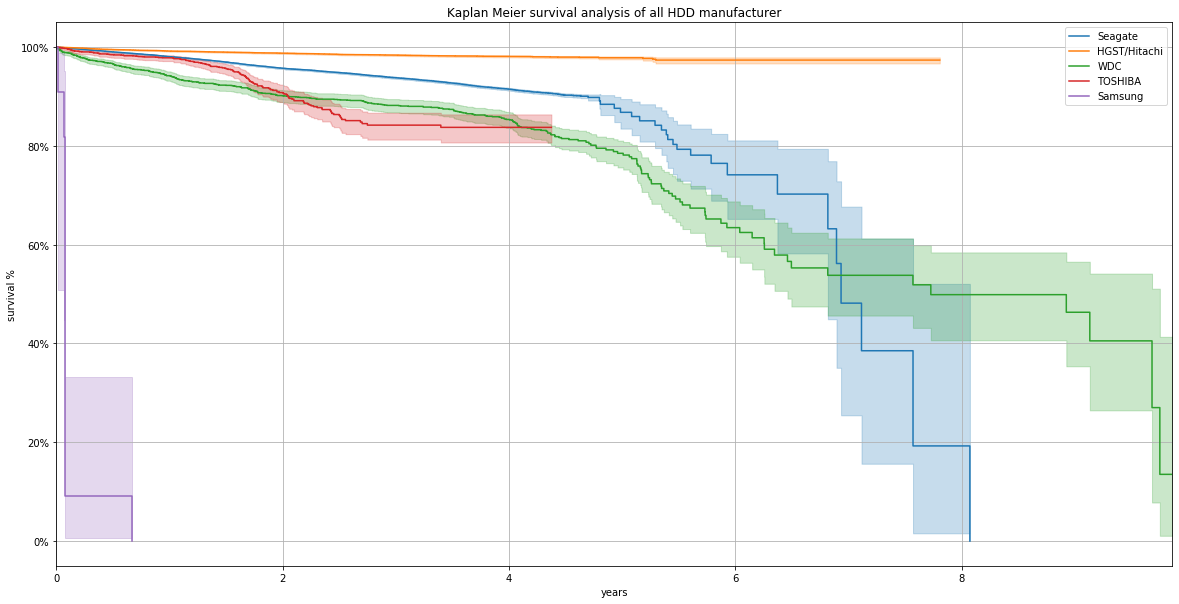

In [155]:
names=['Seagate','HGST/Hitachi','WDC','TOSHIBA','Samsung']
flag='manuf'
title='Kaplan Meier survival analysis of all HDD manufacturer'
kmf_analysis(df,names,flag,title)


In the span of 10 years HGST/Hitachi HDDs performed better than any other HDD with less than 1% failing per year. HGST is high-end product that designed to meet the needs of the scale-out data center where low-power, high-capacity, cost-effective storage is essential. Short lifetime maybe due lack of data.  
  
  
At second place there is Seagate with less than 2.5% HDD failure per year for about 4.5years after that failure rate grew sharply; life time is about little more than 8 years.  
  
  
WDC HDDs had longer lifetime from the data we had.  
  
  
Toshibe HDD failures were occurred before 1.5years and stabilised after that.  
  
  
Samsung HDDs performance is the worst of all and life time is less than a year.

### Kaplan Meier survival analysis of top quantity HDD models

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


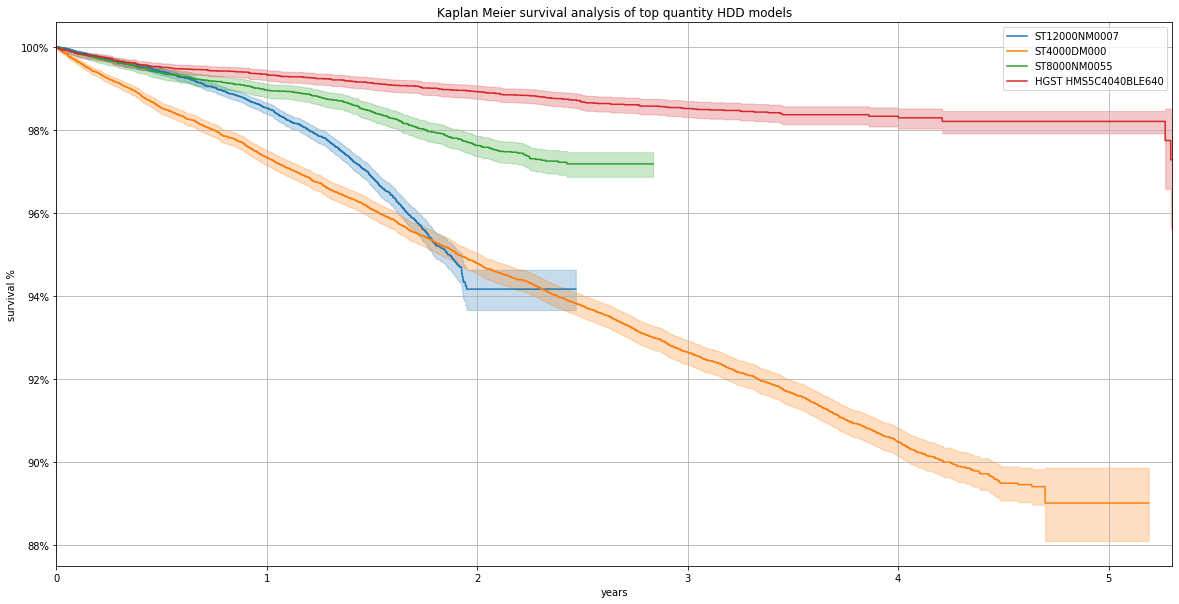

In [156]:
names=['ST12000NM0007', 'ST4000DM000' ,'ST8000NM0055','HGST HMS5C4040BLE640']
flag='model'
title='Kaplan Meier survival analysis of top quantity HDD models'
kmf_analysis(df,names,flag,title)

Enterprice HDD: ST12000NM0007,ST8000NM0055,HGST HMS5C4040BLE640.  
Consumer HDD : ST4000DM000.  
  
  
Among enterprise HDDs HGST performed better with lower failure rate per year and longer lifetime.  
Interestingly ST12000NM0007 HDD failures were occurred before 2 years then stabilised.  
  
Consumer grade ST4000DM000 failure rate 2.5% per year remained constantly for 4.5 years then stabilised.


### Kaplan Meier survival analysis of top 5 HDD used in 2019

C:\Users\Thelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


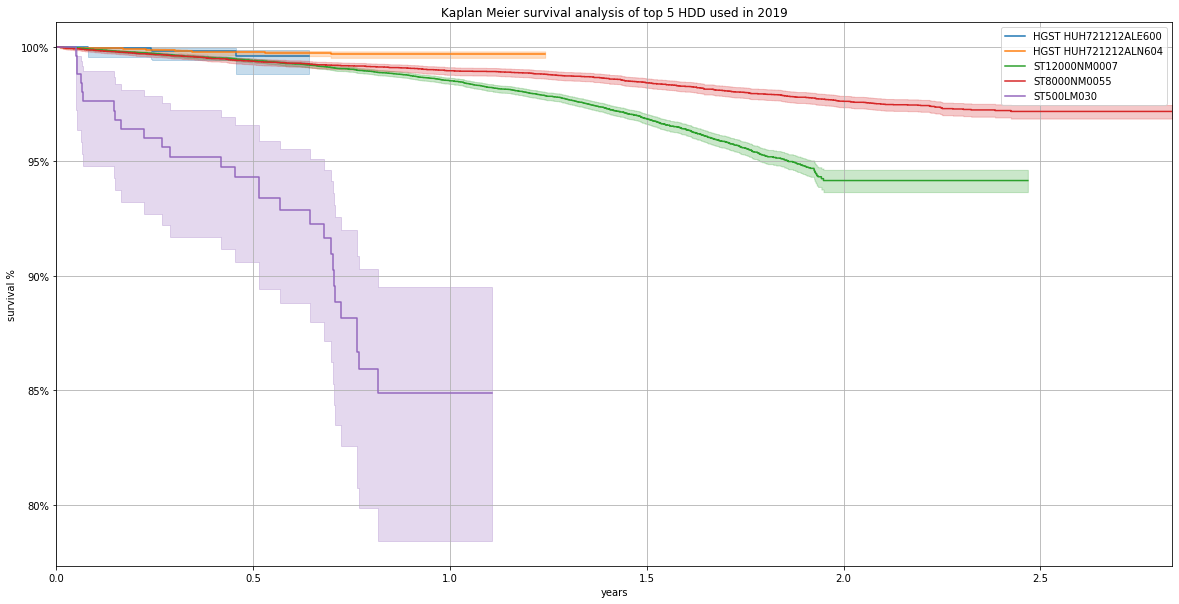

In [157]:
names=['HGST HUH721212ALE600','HGST HUH721212ALN604','ST12000NM0007','ST8000NM0055','ST500LM030']
flag='model'
title='Kaplan Meier survival analysis of top 5 HDD used in 2019'
kmf_analysis(df,names,flag,title)

Both HGST HUH721212ALE600 and HUH721212ALN604 12TB HDDs performed well than other models but lifetime cut short probably due to lack of data.  
ST8000NM0055 8TB HDD has better survival rate with failure rate of 3% over 3years  
ST12000NM0007 12TB HDD 6% failures were occurred before 2years and stabilised.  
ST500LM030 consumer grade 500GB HDD lifetime failure rate is worse than all the above and 15% failures are occurred before 8months of operation and stabilised.